<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Cassandra_logo.svg/2000px-Cassandra_logo.svg.png" style="width: 400px;"/>

<img src="images/twitter.png" style="width: 400px;"/>

---
By the end of this session, you should be able to:
----
- Explain the use case for Cassandra
- Explain how Cassandra works
- Use Hash Rings
- Perform queries Cassandra

---
History
---

![](images/baby.png)

Started by Facebook

[Announcement](https://www.facebook.com/notes/facebook-engineering/cassandra-a-structured-storage-system-on-a-p2p-network/24413138919/)  
[Building Products On It](https://www.facebook.com/notes/facebook-engineering/the-underlying-technology-of-messages/454991608919/)

Thus ...

- Great idea 
- Widespread adoption 
- Will slowly introduce features that bug you (and are slightly creepy)
- But you'll be forced to use because that is what every one else is using

(Sounds like Facebook itself) thus...

aka, Brian's Law of Open Source Projects

HT: Conways' Law: 
    
>organizations which design systems ... are constrained to produce designs which are copies of the communication structures of these organizations

<img src="http://www.sixteensmallstones.org/wp-content/uploads/2015/07/IMG_1029.png" style="width: 400px;"/>

---
Widely Adopted
---

<img src="images/adoption.png" style="width: 400px;"/>

---
Cassandra is great for...
---

- Massive, linear scaling

- Extremely heavy writes

- High availability


---
Linear FTW!
----

![](images/linear.png)



---
Writes more that Stephen King
---

![](images/scaling.png)

---
Cassandra stays up like a kid at a sleep over
----

> Cassandra, our distributed cloud persistence store which is distributed across all zones and regions, dealt with __the loss of one third of its regional nodes without any loss of data or availability__.

[Source](http://techblog.netflix.com/2012/07/lessons-netflix-learned-from-aws-storm.html)

---
Cassandra Overview
---

<img src="http://cassandraconsultingllc.com/wp-content/uploads/2014/03/header-who-is-cassandra-590x224-02.png" style="width: 400px;"/>

Cassandra was a figure in Greek mythology who possessed the gift of prophecy, with the caveat that no-one would believe her prophecies.

For instance, she warned the Trojans about the Greeks hiding inside the Trojan Horse, but no-one believed her. So Troy was destroyed.

Don't be like Troy - Believe in Cassandra!

> Cassandra is a distributed storage system for managing structured data that is designed to scale to a very large size across many commodity servers, with no single point of failure... 

> Hence Cassandra aims to run on top of an infrastructure of hundreds of nodes (possibly spread across different datacenters). 

Cassandra has achieved several goals:

- scalability
- high performance
- high availability
- applicability

Cassandra manages the persistent state in the face of these failures drives reliability and scalability.

It can be write heavy real-time datastore (aka, the "system of record) and read heavy database for Business Intelligence (BI) applications

----
Cassandra as a NoSQL solution
----

In many ways, Cassandra resembles a traditional database. 

__However__, Cassandra does not support a full relational data model.

Instead, it provides clients with a simple data model that supports dynamic control over data layout and format

---
Data Model
---

Every row is identified by a unique key (string).

An instance of Cassandra has 1 table which is made up of one or more "column families".

Column families are defined by the user.

<img src="images/c_a.jpg" style="width: 400px;"/>

Built from the ground-up in a distributed world, like Apache Kafka

Peer-to-peer, distributed system (remember Conway's Law)

All nodes are the same (no leaders, no Main nodes)

Data partitioned among all nodes in a the cluster

Read/Write __anywhere__ design, not limited to communication to Single Point of Failure (SPOF)

Gossip protocol to exchange information:

> Who is up?  
> Who knows what?  
> Which node is "It's complicated" with which other node?  

---
Distribution, Replication and Fault Tolerance
---

Data is distributed across the nodes in the cluster using __Consistent Hashing__ based and on an Order Preserving Hash function. Order Preserving Hash is used that we could perform range scans over the data for analysis at some later point.

Cluster membership is maintained via Gossip style membership algorithm. Failures of nodes within the cluster are monitored using an Accrual Style Failure Detector.

High availability is achieved using replication and we actively replicate data across data centers. Since _eventual consistency_ is the mantra of the system reads execute on the closest replica and data is repaired in the background for increased read throughput.

System exhibits incremental scalability properties which can be achieved as easily as dropping nodes and having them automatically bootstrapped with data.

----
Data Writing
----

A commit log is used on each node to capture write activity to assure data durability

Data is also written to an in-memory structure (memory) and then to disk once the memory structure is full (SStable)

<img src="images/write.png" style="width: 400px;"/>

---
Cluster Architecture
---

---
Remeber Hashing...
---

<img src="http://www.cannabisculture.com/files/images/6/hashbrick.JPG" style="width: 400px;"/>


A hash table (e.g., Python dict) is a data structure hat can map keys to values. A hash table uses a hash function to compute an index into an array of slots, from which the desired value can be found.

Map a key k into one of m slots by taking the remainder of k divided by m. That is, the hash function is:

$$h(k) = k \space mod(m)$$

---
Check for understanding
---

<details><summary>
If table size m = 6 and key k = 40, what is the slot index?
</summary>
4
</details>
<br>
<br>
<details><summary>
Name 2 reasons why this a bad design:
</summary>
1. That stupid small hash table. You will get collisions all the freaking time.  
2. The pro tip is to make the size of your hash table a prime number so you don't lots of collisions in the 1st bucket.  
</details>

---
Modulo Arithmetic Sidebar
----

Modulo Arithmetic is analog clock math:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Clock_group.svg/2000px-Clock_group.svg.png" style="width: 400px;"/>

Modulo arithmetic uses only a finite set of numbers, wrapping the results of any calculations that fall outside the given set back into the set.

Use a ring hash instead of a row of slots:
<img src="http://67.media.tumblr.com/63a7e035f115934aee7529e48b8842ae/tumblr_nfnwaqw7LR1u4zn7qo1_400.gif" style="width: 400px;"/>


### Modulo Arithmetic practice: 

For example, the common everyday clock uses modulo 12 arithmetic. Numbers in this system can only be 1 through 12. Therefore, in the "clock" system, 9 plus 9 equals 6. This can be more easily visualized as a number circle:
<br>
<details><summary>
Click here for visual solution...
</summary>
<img src="http://www.mathworks.com/help/fixedpoint/ug/fixed-point_concepts23.png" style="width: 400px;"/>
</details>
<br>
<br>

Similarly, binary math can only use the numbers 0 and 1, and any arithmetic results that fall outside this range are wrapped "around the circle" to either 0 or 1.

[Source](http://www.mathworks.com/help/fixedpoint/ug/arithmetic-operations.html?requestedDomain=www.mathworks.com)

---
Consistent hashing FTW!
---

> Consistent hashing allows distributing data across a cluster which minimizes reorganization when nodes are added or removed

> Consistent hashing partitions data based on the partition key

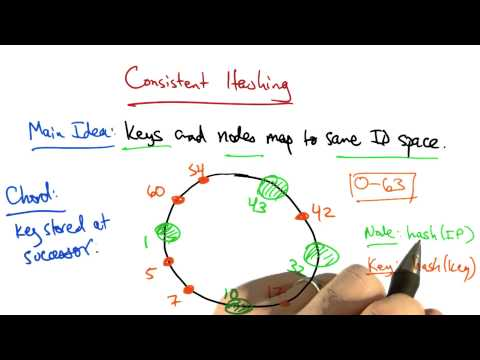

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('viaNG1zyx1g')

---
Consistent Hashing of Cassandra Data
---

[Source](https://docs.datastax.com/en/cassandra/2.0/cassandra/architecture/architectureDataDistributeHashing_c.html)

---
Data Distribution
---

[Consistent Hashing demo](http://vanstee.me/distributed-data/consistent-hashing.html)

![](images/nodes.png)

<img src="images/ring_hash.png" style="width: 400px;"/>

<img src="images/replication.png" style="width: 400px;"/>

---
Across Data Centers
---

<img src="images/dc.png" style="width: 400px;"/>

![](images/replication_dc.png)

![](https://mariadb.org/wp-content/uploads/2015/02/cops.jpeg)

---
You say SQL; I say CQL
---

Cassandra Query Language. CQL for short. 

SQL look-a-like (best effort).

<img src="images/terms.png" style="width: 400px;"/>

Keyspace is akin to a database in the RDMS universe

A column family is similar to RDMS table but is more flexible/dynamic

A row in a column family is indexed by its key. Other columns can be indexed also

<img src="images/example.png" style="width: 400px;"/>

<img src="images/modeling.png" style="width: 400px;"/>

---
Denormalize
---

> Denormalization is the process of attempting to optimize the read performance of a database by adding redundant data or by grouping data.

Create materialized views of the same data to support different queries

Storage space is cheap & Cassandra is fast

---
Example: User Logins
----

<img src="images/query.png" style="width: 400px;"/>

----
<img src="images/key.png" style="width: 400px;"/>

----
<img src="images/clustering.png" style="width: 400px;"/>

---
<img src="images/columns.png" style="width: 400px;"/>

----
<img src="images/add_cols.png" style="width: 400px;"/>

---
<img src="images/result.png" style="width: 400px;"/>

But watch out for ...
![](images/watch.png)

---
Summary
----

- Cassandra is very popular NoSQL solution
- It allows for massive, linear scaling, extremely heavy writes, and high availability
- Modulo Arithmetic is nice trick for job interviews and building distributed databases
- Cassandra use Consistent Hashing (via Modulo Arthimetic) for distrbuted data storage
- The data model allows for flexible querying


<br>
<br>
<br>
<br>
<br>
<br>

---
Bonus Materials
----

Learn More 
----

- [DataStack's Free Online Course](https://academy.datastax.com/courses)
- [cassandra succinctly](https://www.syncfusion.com/resources/techportal/ebooks/cassandra)
- [Cassandra: The Definitive Guide](http://shop.oreilly.com/product/0636920010852.do)

---
Where does Cassandra shine?
----

__TimeSeries__ is the most common data model

Examples:
    
- event logs
- metrics
- sensors / IoT (drink 🍸)

---
![](images/another_query.png)

---
![](images/create.png)

---
Implementation Details
---

![](http://4.bp.blogspot.com/-mb-4_3qLkGk/TrG5kOlMGCI/AAAAAAAAAWY/_DEzto-YwOs/s1600/local.png)

![](images/read.png)

<br>
<br> 
<br>

----